<a href="https://colab.research.google.com/github/faridelya/CRUD-WebFlaskApp/blob/main/A_19_Flight_Satisfaction_Prediction_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Question 1. Explain the hyperparameters required for the Random Forest algorithm.**

### **Question 2. How is Random Forest different from a single decision tree?**

### **Question 3. Why is it important to assess machine learning models using withheld validation data as opposed to the data points used to train the model?**

### **Task 1. Prepare the data by (1) filtering to create a data table that includes only the dependent variable (“Satisfaction”) and the independent variables used to predict it: “Gender”, “Age”, “Customer.Type”, “Type.of.Travel”, “Class”, “Flight.Distance”,“Departure.Delay”, and “Arrival.Delay”. “Gender”, “Age”, “Customer.Type”,“Type.of.Travel”, and “Class” should be treated as nominal data. “Flight.Distance”,“Departure.Delay”, and “Arrival.Delay” should be treated as continuous data.“Satisfaction” has two levels: "Neutral or Dissatisfied" and "Satisfied". Remove any rows with missing data in any column.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
X = pd.read_csv("/content/drive/MyDrive/mos_data/train.csv")
test= pd.read_csv("/content/drive/MyDrive/mos_data/test.csv")

In [ ]:
X = X[[ 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Age                         103904 non-null  int64  
 3   Type of Travel              103904 non-null  object 
 4   Class                       103904 non-null  object 
 5   Flight Distance             103904 non-null  int64  
 6   Departure Delay in Minutes  103904 non-null  int64  
 7   Arrival Delay in Minutes    103594 non-null  float64
 8   satisfaction                103904 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.1+ MB


In [ ]:
X.isnull().sum() #  there is null values

Gender                          0
Customer Type                   0
Age                             0
Type of Travel                  0
Class                           0
Flight Distance                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
satisfaction                    0
dtype: int64

In [ ]:
X = X.dropna()# removed null values
X.isnull().sum() 

Gender                        0
Customer Type                 0
Age                           0
Type of Travel                0
Class                         0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

In [ ]:
depndent = pd.DataFrame()
depndent['satisfaction'] = X['satisfaction']
ind = X.drop(['satisfaction'],axis=1)
print("target variable ",depndent.shape, "\nIndependent variables ", ind.shape)

cont = ind[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
nominal = ind[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',]]


target variable  (103594, 1) 
Independent variables  (103594, 8)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# conert nominal data to label encoder
n = nominal[['Gender', 'Customer Type', 'Type of Travel', 'Class']].apply(LabelEncoder().fit_transform)
n['Age'] = nominal['Age']

lbe = LabelEncoder()
depndent['satisfaction_encode']= lbe.fit_transform(depndent['satisfaction']) 
indepndnt = pd.concat([n,cont],axis=1)


indepndnt.head(3)

,Gender,Customer Type,Type of Travel,Class,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,2,13,460,25,18.0
1,1,1,0,0,25,235,1,6.0
2,0,0,0,0,26,1142,0,0.0


In [ ]:
depndent['satisfaction_encode']   # Neutral or Dissatisfied  is 0  ,   "Satisfied" is 1

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction_encode, Length: 103594, dtype: int64

### **Task 2. Create grouped bar plots to compare “Satisfaction” to each of the nominal predictor variables. Describe the results. Which variables seem to be predictive of flight satisfaction.**

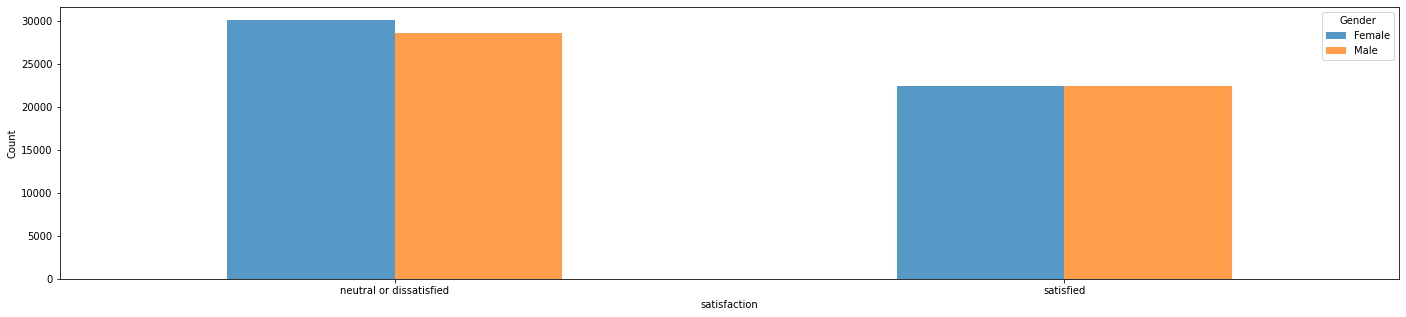

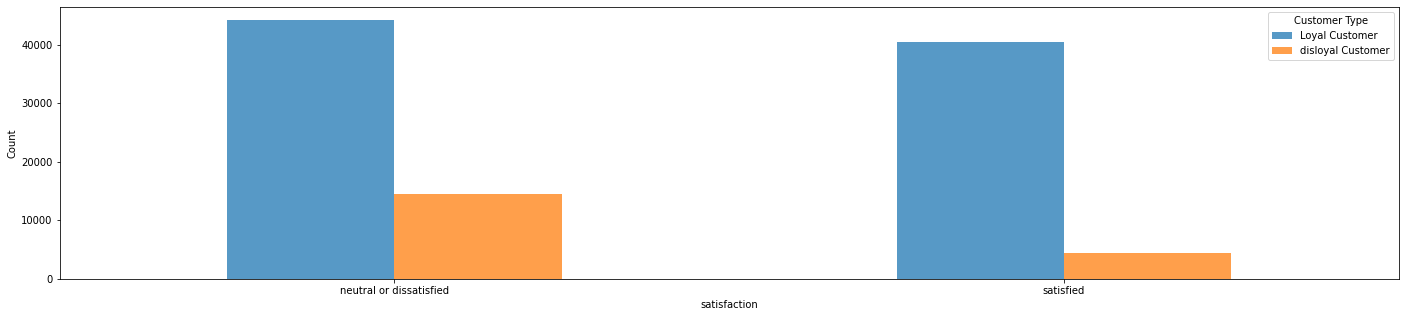

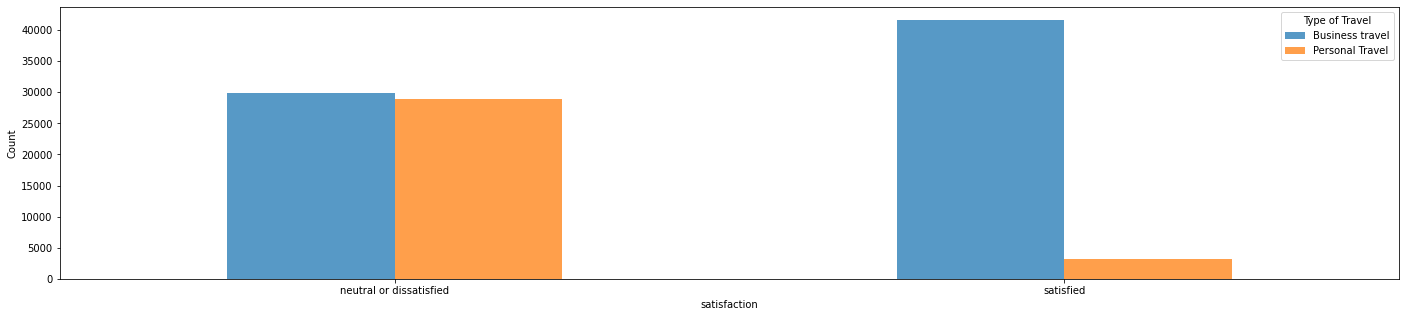

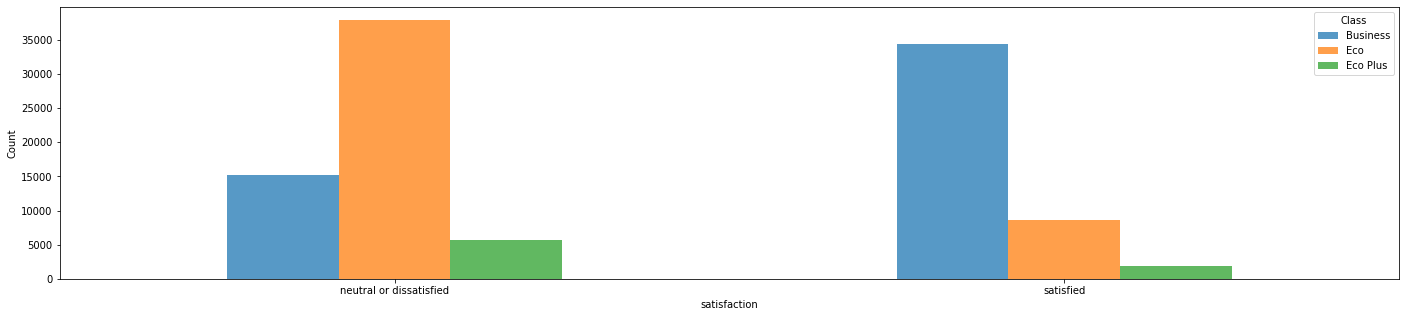

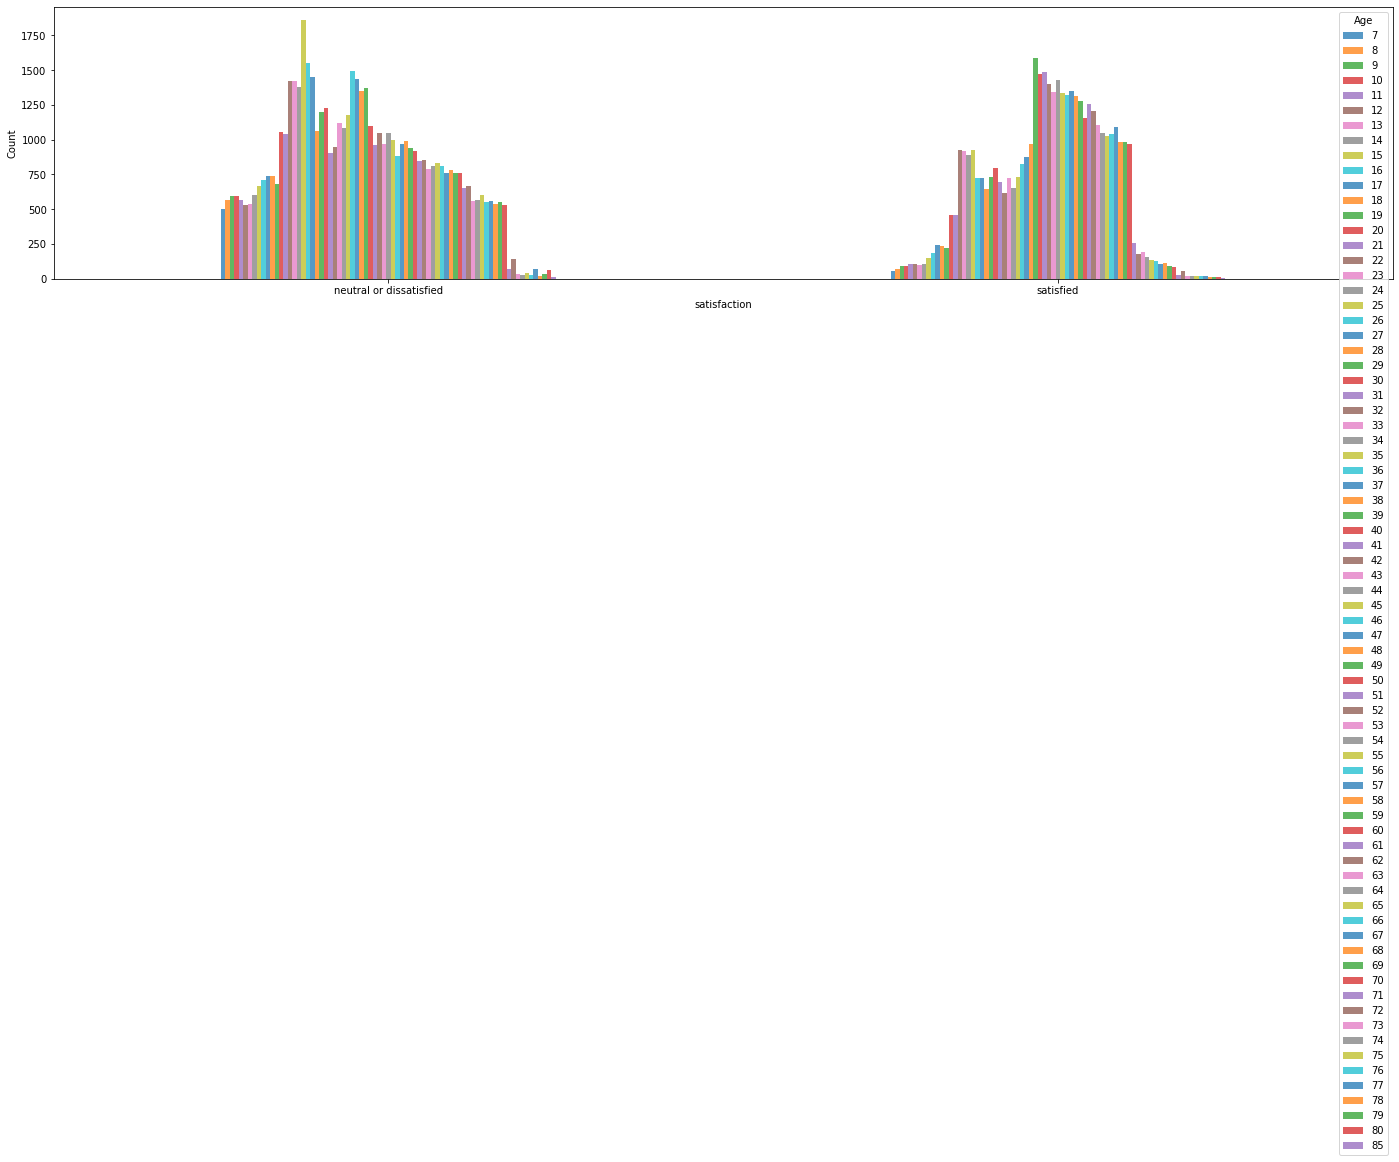

In [ ]:
all = pd.concat([nominal,depndent['satisfaction']],axis=1)
a= ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age']
for i in a :
  fig, ax= plt.subplots(figsize=(24,5))
  all.groupby(['satisfaction'])[i].value_counts().reset_index(name='counts').pivot(index='satisfaction', columns=i, values='counts').plot(kind='bar',ax=ax, alpha=0.75, rot=0)
  ax.set_ylabel("Count")


### **Task 3. Create grouped boxplots to compare “Satisfaction” to each of the continuous predictor variables. Describe the results. Which variables seem to be predictive of flight satisfaction.**

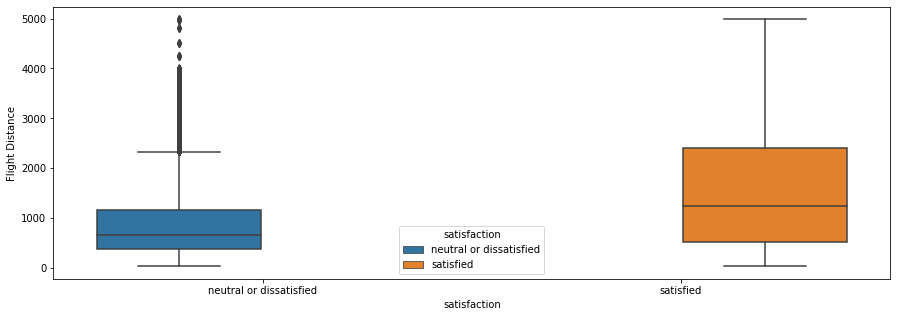

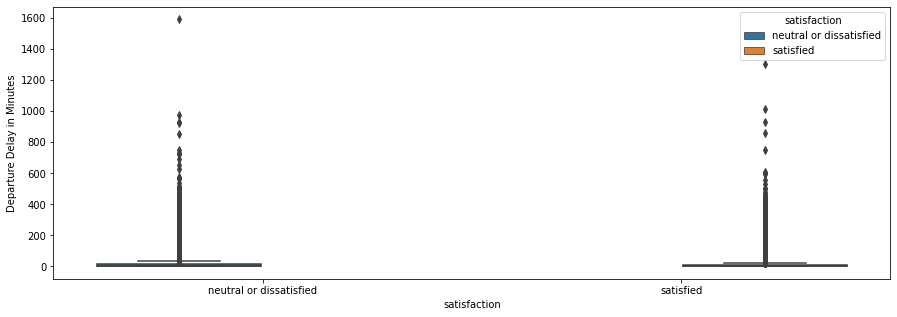

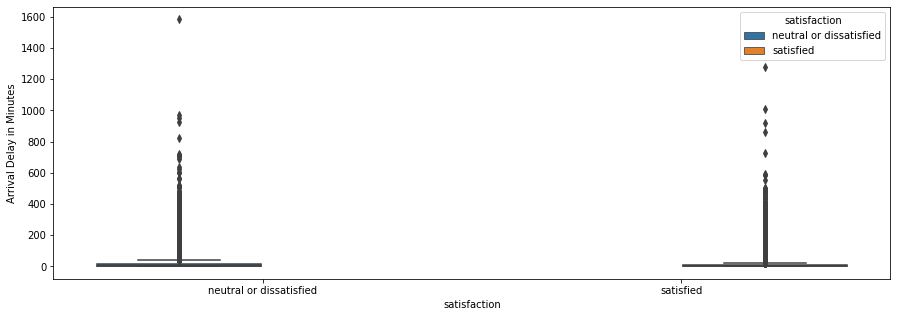

In [ ]:
all = pd.concat([cont,depndent],axis=1)
a= ["satisfied" , 'neutral or dissatisfied']
for i in cont.columns:
  fig, ax= plt.subplots(figsize=(15,5))
  sns.boxplot(data=all , x='satisfaction', y=all[i], hue='satisfaction')
  plt.show()

**Flight Distance has predictive power** because there data has variance and little outliers . The other 2 plots show outlier in high amout so it has no predictive power.

### **Task 4. Split the data into separate, non-overlapping training and testing sets. 75% of the data should be used to train the model while 25% should be maintained for validation. Stratify the partition using the “Satisfaction” variable.**

In [ ]:
from sklearn.model_selection import train_test_split
X = indepndnt
y = depndent['satisfaction_encode']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77695, 8), (25899, 8), (77695,), (25899,))

### **Task 5. Train a Random Forest model. Use 500 trees and 3 variables to select from for splitting at each decision node. You do not need to optimize the hyperparameters for this assignment**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=500, min_samples_split=3)
model = clf.fit(X_train, y_train)

### **Task 6. Use the trained model to predict to the withheld test data. From the results, calculate the Area Under the Receiver Operating Characteristic (ROC) Curve and Overall Accuracy metrics. Also, create a Confusion Matrix. Discuss thee results of the assessment.**

In [ ]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

acc =accuracy_score(y_test, pred)
auc_roc = roc_auc_score(y_test, pred_prob[:,1])
print("accuracy ",acc, "\n auc_roc", auc_roc)

accuracy  0.7786401019344377 
 auc_roc 0.8405696876126965


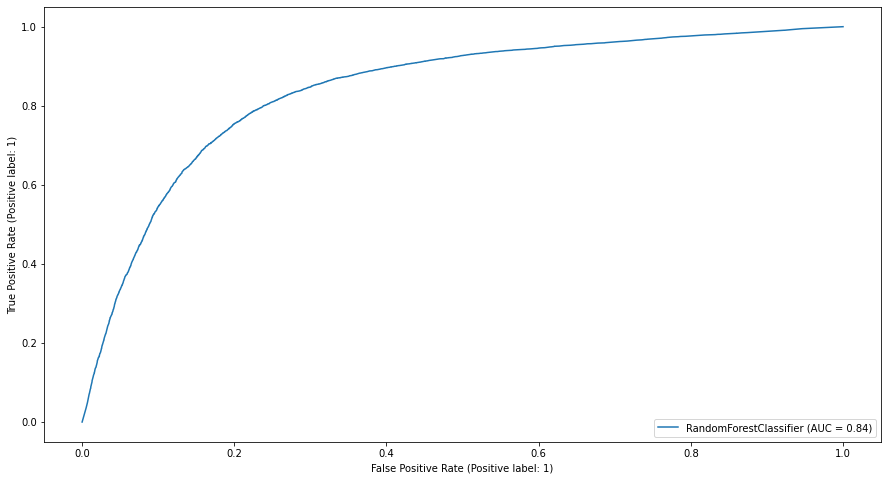

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
RocCurveDisplay.from_estimator(clf , X_test, y_test, ax=ax, pos_label=1)
plt.show()

### **Task 7. Use the variable importance estimates made available by Random Forest to discuss the contribution of each predictor variable in the model**

**Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.**

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_ # random forest feature importance    
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.095 seconds


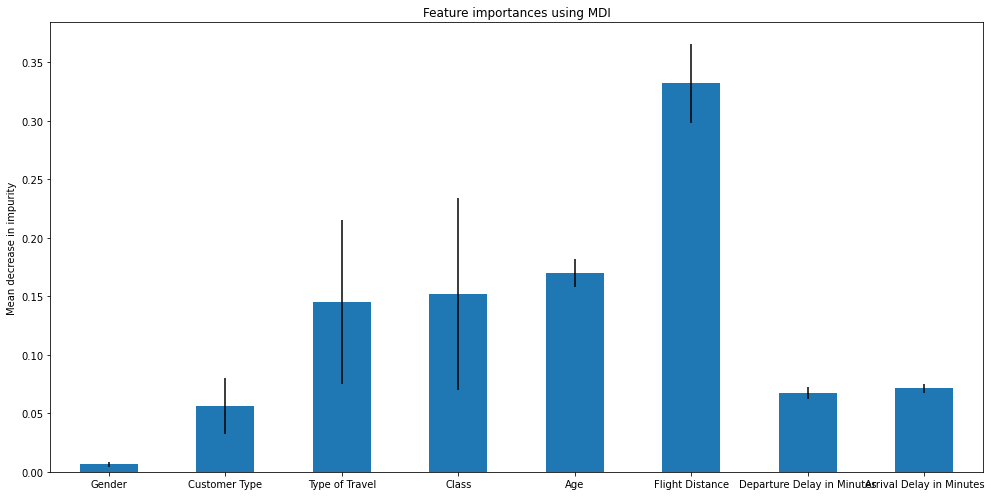

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(14,7))
forest_importances.plot.bar(yerr=std, ax=ax, rot=0)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The features that are most important are **type of travel , class, Age, Flight Distance**  this method may mislead so we check for other method.

**Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.**

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances2 = pd.Series(result.importances_mean, index=X.columns)

Elapsed time to compute the importances: 64.452 seconds


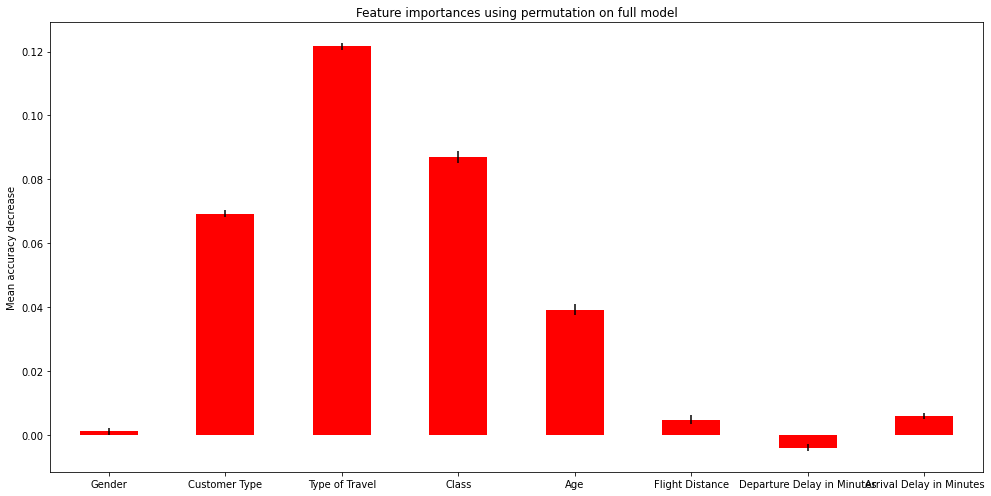

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax, rot=0,color='red')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Here we see **Customer Type, Type of Travel, Class, Age**    so in previous method  we got opposite result of this method  so this method show that these features are important and most contributing in model building. and this method is good than previous method and we rely on this